## NAME CLASSIFICATION USING RECURSIVE NN

In [1]:
import torch
import random
import torch.nn as nn
from model import RecursiveNN 
from data import load_data, name_to_tree
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
category_lines, all_categories = load_data()
n_categories = len(all_categories)
model = RecursiveNN(input_size=57, hidden_size=256, output_size=n_categories).to(device) 
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [3]:
def random_training_example():
    category = random.choice(all_categories)
    name = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long).to(device)
    name_tensor = name_to_tree(name, device) 
    return category_tensor, name_tensor


def train(n_iters=100000):
    model.train()
    training_losses = []
    current_loss = 0
    for iter in range(1, n_iters + 1):
        category_tensor, name_tensor = random_training_example()
        optimizer.zero_grad()
        output = model.classify(name_tensor)
        loss = criterion(output, category_tensor)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()

        if iter % 500 == 0:
            print(f"Epoch: {iter} | Loss: {(current_loss / 500)}")
            training_losses.append(current_loss / 500)
            current_loss = 0

    plt.plot(range(len(training_losses)), training_losses)
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()
    torch.save(model.state_dict(), "model.pth")


Epoch: 500 | Loss: 2.876570631980896
Epoch: 1000 | Loss: 2.8017062344551085
Epoch: 1500 | Loss: 2.6764629526138304
Epoch: 2000 | Loss: 2.6580077035427094
Epoch: 2500 | Loss: 2.57006179690361
Epoch: 3000 | Loss: 2.540258793115616
Epoch: 3500 | Loss: 2.5286624813079834
Epoch: 4000 | Loss: 2.5173537774085997
Epoch: 4500 | Loss: 2.435992524266243
Epoch: 5000 | Loss: 2.3520360264778137
Epoch: 5500 | Loss: 2.3573979150652886
Epoch: 6000 | Loss: 2.249705539047718
Epoch: 6500 | Loss: 2.1445976020097732
Epoch: 7000 | Loss: 2.0571401796787976
Epoch: 7500 | Loss: 1.933355979681015
Epoch: 8000 | Loss: 1.868761378005147
Epoch: 8500 | Loss: 1.950570778310299
Epoch: 9000 | Loss: 1.9306792983710765
Epoch: 9500 | Loss: 1.9262993755191564
Epoch: 10000 | Loss: 1.853423042960465
Epoch: 10500 | Loss: 1.6355902119912207
Epoch: 11000 | Loss: 1.7641863276138903
Epoch: 11500 | Loss: 1.6437165324669332
Epoch: 12000 | Loss: 1.718646936153993
Epoch: 12500 | Loss: 1.72638458558172
Epoch: 13000 | Loss: 1.6658852853

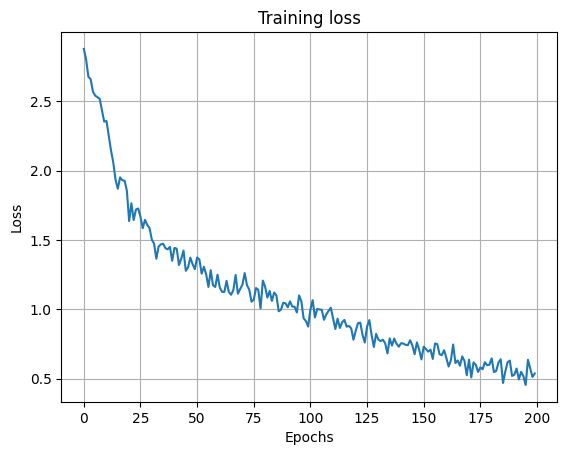

In [4]:
if __name__ == "__main__":
    train()